In [6]:
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 


In [15]:
df = pd.read_csv('Food_Delivery_Time_Prediction.csv')
df.head()

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,Rainy,Medium,4,Medium,Afternoon,Car,4.1,3.0,26.22,1321.10,81.54
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,Cloudy,Medium,8,Low,Night,Car,4.5,4.2,62.61,152.21,29.02
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,Snowy,Medium,9,High,Night,Bike,3.3,3.4,48.43,1644.38,64.17
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",13.79,Cloudy,Low,2,Medium,Evening,Bike,3.2,3.7,111.63,541.25,79.23
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",6.72,Rainy,High,6,Low,Night,Bike,3.5,2.8,32.38,619.81,2.34


In [4]:
print(df.isnull().sum())

Order_ID                      0
Customer_Location             0
Restaurant_Location           0
Distance                      0
Weather_Conditions            0
Traffic_Conditions            0
Delivery_Person_Experience    0
Order_Priority                0
Order_Time                    0
Vehicle_Type                  0
Restaurant_Rating             0
Customer_Rating               0
Delivery_Time                 0
Order_Cost                    0
Tip_Amount                    0
dtype: int64


In [10]:
from sklearn.preprocessing import LabelEncoder 
ls = LabelEncoder()
df['Weather_Conditions'] = ls.fit_transform(df['Weather_Conditions']) 
df['Vehicle_Type'] = ls.fit_transform(df['Vehicle_Type'])

In [16]:
colums = ['Distance' , 'Delivery_Time']
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaler.fit(df[colums])
scaler_data = scaler.transform(df[colums])
scaler_dataf = pd.DataFrame(scaler_data)
scaler_dataf.columns = ['Distance' , 'Delivery_Time']
scaler_dataf

,Distance,Delivery_Time
0,-1.454738,-1.487932
1,1.439192,-0.264987
2,-0.666417,-0.741529
3,0.335835,1.382411
4,-0.700119,-1.280915
...,...,...
195,1.805512,-0.675660
196,-0.792431,0.673647
197,1.335157,0.090908
198,1.840679,-0.556356


In [17]:
df['delayed'] = df['Delivery_Time'].apply(lambda x:1 if (x>40) else 0 )

In [37]:
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import accuracy_score , confusion_matrix,classification_report,precision_score,recall_score,f1_score
x=df[['Distance' , 'Delivery_Time']]
y = df['delayed']
x_train , x_test , y_train,y_test = train_test_split(x,y,test_size = 0.3)
gnb = GaussianNB()
gnb.fit(x_train,y_train)
y_pred = gnb.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9833333333333333
Confusion Matrix:
 [[14  0]
 [ 1 45]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.98      0.99        46

    accuracy                           0.98        60
   macro avg       0.97      0.99      0.98        60
weighted avg       0.98      0.98      0.98        60



In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
cv_score = []
k_range = range(1,21)

for k in k_range :
    knn = KNeighborsClassifier(n_neighbors = k )
    scores = cross_val_score(knn, x_train, y_train, cv=5, scoring='accuracy')
    cv_score.append(scores.mean())
    


In [39]:
best_k = k_range[cv_score.index(max(cv_score))]
print("Best K:", best_k)

Best K: 9


In [42]:
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(x_train, y_train)
y_pred = knn_best.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred)*100)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred)*100)
print("F1 Score:", f1_score(y_test, y_pred)*100)

Accuracy: 96.66666666666667
Confusion Matrix:
 [[14  0]
 [ 2 44]]
Precision: 1.0
Recall: 95.65217391304348
F1 Score: 97.77777777777777


In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier()
parameter = {
    'criterion' : ['gini' , 'entropy' , 'log_loss'],
     'splitter' : ['best ', 'random'],
     'max_depth' : [1,2,3,4,5],
    'max_features' :['auto' , 'sqrt' , 'log2'],
    'ccp_alpha' : [1,2,3,4,5,6,7]
}
grid = GridSearchCV(tree_model , param_grid = parameter, cv = 5, scoring = 'accuracy')
grid.fit(x_train,y_train)
grid.best_params_

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
2100 fits failed out of a total of 3150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1050 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\anaconda3\Lib\site-pac

{'ccp_alpha': 1,
 'criterion': 'gini',
 'max_depth': 1,
 'max_features': 'sqrt',
 'splitter': 'random'}

In [49]:
y_pred = grid.predict(x_test)


In [50]:
print("Accuracy:", accuracy_score(y_test, y_pred)*100)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred)*100)
print("F1 Score:", f1_score(y_test, y_pred)*100)

Accuracy: 76.66666666666667
Confusion Matrix:
 [[ 0 14]
 [ 0 46]]
Precision: 0.7666666666666667
Recall: 100.0
F1 Score: 86.79245283018868


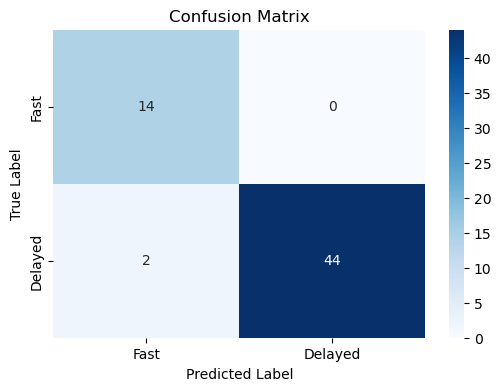

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
# Predict again if needed
y_pred = knn_best.predict(x_test)

# Generate Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fast', 'Delayed'], yticklabels=['Fast', 'Delayed'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
